# Intro to Data Visualization with Matplotlib

Author: Emmanuel Rodriguez

https://emmanueljrodriguez.com/

Date: 12 May 2022

## Data to be explored: World Development Indicators (WDI)

https://datatopics.worldbank.org/world-development-indicators/?msclkid=905295b0cef211eca247786f37737c73

## Step 1: Initial exploration of the dataset

In [43]:
# Import libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [44]:
data = pd.read_csv(r'C:\Users\ejoaq\OneDrive\1 My_Notebook\2 Entrepreneurship and Work\1 Teaching\1 National University\1 ANA 500 - Python for Data Science\My Notebooks - from edX course\WDI_csv\WDIData.csv')
# Prefix with 'r' to produce raw string
data.shape

(384370, 67)

Let's explore what the data holds.

In [45]:
data.head(10) # Use the head() method to view the headers of n rows

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.936004,17.337896,17.687093,18.140971,18.491344,18.825520,19.272212,19.628009,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.499471,6.680066,6.859110,7.016238,7.180364,7.322294,7.517191,7.651598,NaN,NaN
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,37.855399,38.046781,38.326255,38.468426,38.670044,38.722783,38.927016,39.042839,NaN,NaN
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.794160,32.001027,33.871910,38.880173,40.261358,43.061877,44.270860,45.803485,NaN,NaN
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,18.663502,17.633986,16.464681,24.531436,25.345111,27.449908,29.641760,30.404935,NaN,NaN
5,Africa Eastern and Southern,AFE,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,67.112206,66.283426,67.080235,69.132292,70.928567,71.866136,73.332842,73.942949,NaN,NaN
6,Africa Eastern and Southern,AFE,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Africa Eastern and Southern,AFE,Account ownership at a financial institution o...,FX.OWN.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Africa Eastern and Southern,AFE,Account ownership at a financial institution o...,FX.OWN.TOTL.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Africa Eastern and Southern,AFE,Account ownership at a financial institution o...,FX.OWN.TOTL.OL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This is a three-dimensional dataset, where the dimensions are: country, indicator, and year.

### How many unique country names are there?

In [46]:
countries = data['Country Name'].unique().tolist()
print(len(countries))
print(type(countries))

266
<class 'list'>


In [47]:
# For a quick sanity check, cross-check the number of country codes with the number of countries:
countryCodes = data['Country Code'].unique().tolist()
print(len(countryCodes))
print(type(countryCodes))

266
<class 'list'>


### How many indicators are there?

In [48]:
indicators = data['Indicator Name'].unique().tolist()
len(indicators)

1445

In [49]:
# List environment variables that have been created so far:
%whos

Variable         Type         Data/Info
---------------------------------------
co2              list         n=29
countries        list         n=266
countryCodes     list         n=266
data             DataFrame                           Co<...>384370 rows x 67 columns]
hist_country     str          USA
hist_indicator   str          CO2 emissions (metric
indicators       list         n=1445
k                int          6
mask1            Series       0         False\n1       <...>ngth: 384370, dtype: bool
mask2            Series       0         False\n1       <...>ngth: 384370, dtype: bool
math             module       <module 'math' (built-in)>
np               module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd               module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt              module       <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
random           module       <module 'random' from 'C:<...>aconda3\\lib\\random.py'>

### How many years of data do we have?

In [50]:
years = data.columns[4:-1]
len(years)

62

In [51]:
print(type(years))
print(years.shape)

<class 'pandas.core.indexes.base.Index'>
(62,)


In [52]:
# Convert index to list:
years = years.tolist()
print(len(years))
print(type(years))

62
<class 'list'>


### Range of years:

In [53]:
print(min(years), " to ", max(years))

1960  to  2021


## Matplotlib: Basic plotting

### Country and indicator to explore:

USA and CO2 emissions per capita

In [54]:
# Create and set variables to hold indicator and country
hist_indicator = 'CO2 emissions (metric'
hist_country = 'USA'

# Setup two masks (or filters):
mask1 = data['Indicator Name'].str.contains(hist_indicator, regex = False) # Set the regular expression parameter to False
# to treat the string argument as a literal string.
mask2 = data['Country Code'].str.contains(hist_country)

# Create and set a DataFrame called stage:
stage = data[mask1 & mask2]
print(type(stage))

<class 'pandas.core.frame.DataFrame'>


In [55]:
stage.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
368668,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,16.102958,16.026379,15.535342,15.131747,14.805882,15.240875,NaN,NaN,NaN,NaN


### Revised range of years:

In [22]:
print(min(years), " to ", max(years))

1990  to  2018


### Handle missing data

In [56]:
# Drop columns with NaN values:
stage = stage.dropna(axis = 1) # Set axis parameter to 1 to drop columns with NaN, set it to 0 to drop rows with NaN

In [57]:
stage.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
368668,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,19.409229,19.005736,19.025082,19.238109,19.280611,19.253938,...,16.818868,17.434196,16.599404,15.771145,16.102958,16.026379,15.535342,15.131747,14.805882,15.240875


### Plot indicator over time using Matplotlib

In [58]:
# Get the years
years = stage.columns[4:].tolist()

print(len(years))
print(type(years))
print(type(years[0]))

29
<class 'list'>
<class 'str'>


In [59]:
# Get the CO2 values
co2 = stage[years].values # Use the 'years' list to select the corresponding co2 values
print(len(co2))
print(type(co2))
print(type(co2[0]))
print(co2.shape)

1
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1, 29)


In [60]:
# Change elements in 'years' list from string to integer:
years = [int(years) for years in years]

print(len(years))
print(type(years))
print(type(years[0]))

29
<class 'list'>
<class 'int'>


In [61]:
#years

In [62]:
# Transpose co2 data to allow conversion to scalar
co2 = np.transpose(co2)
print(co2.shape)

(29, 1)


In [63]:
# Change elements in CO2
co2 = [float(co2) for co2 in co2]
print(len(co2))
print(type(co2))
print(type(co2[0]))

29
<class 'list'>
<class 'float'>


### Plot

<BarContainer object of 29 artists>

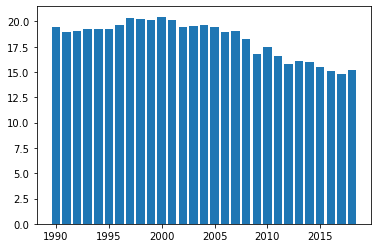

In [64]:
plt.bar(years, co2)

It can be seen that CO2 emissions has dropped over time; the graphic should be more interpretable.

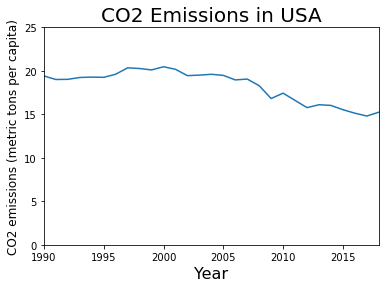

In [65]:
# Switch to a line plot
plt.plot(years, co2)

# Label the axes
plt.xlabel('Year', fontsize = 16) # xlabel is a method on the plot
plt.ylabel(stage['Indicator Name'].iloc[0], fontsize = 12)

# Title
plt.title('CO2 Emissions in USA', fontsize = 20)

# Adjust the axis
plt.axis([1990,2018,0,25]);

# Adjust x-axis ticks
#plt.xticks(np.arange(min(years), max(years), 3));

### Histogram to explore distribution

LaTeX format:

Calculate number of bins using the square-root method

$k = \lceil sqrt(n) \rceil$

Where $\lceil$ and $\rceil$ indicate the celing function (the smallest integer >= input argument), and $n$ is the sample size.

In [66]:
import math
k = math.ceil(math.sqrt(len(co2)))
k

6

Text(0, 0.5, '# of Years')

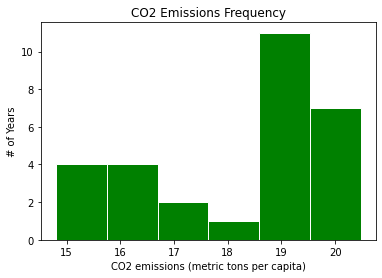

In [69]:
plt.hist(co2, k, facecolor = 'green', edgecolor = 'white')

plt.title('CO2 Emissions Frequency')
plt.xlabel(stage['Indicator Name'].iloc[0])
plt.ylabel('# of Years')
#plt.grid(True)

The USA has several years where its CO2 emissions were 19 metric tons per capita or greater.

### How does the USA CO2 emissions compare to other countries?

## Other Matplotlib plots:

https://matplotlib.org/stable/plot_types/index.html